In [4]:
from sklearn import svm 

model = svm.SVC()

# features
X = [
    [10,8, 10],
    [10,9, 9],
    [5, 5, 5],
    [8,6,0]
    
]

# labels
y = [1, 1, 0,0]

In [5]:
model.fit(X, y)

SVC()

In [11]:
model.predict([[7, 7, 7]])

array([0])

In [39]:
# tem, humidy, pressure
nested_list = [
    [6, 7, 8],
    [5, 5, 9],
    [7, 8, 9],
    [7, 5, 6],
    [2, 5, 8],
    [3, 6, 9],
    [1, 5, 9],
    [2, 6, 7],
    [3, 4, 8],
    [1, 6, 8],
    [2, 4, 9],
    [3, 5, 7],
    [6, 6, 6],
    [2, 8, 6],
    [4, 7, 5],
    [1, 9, 6],
    [3, 8, 5],
    [2, 7, 4],
    [6, 9, 1],
    [8, 5, 3]
]

labels = [1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
len(nested_list), len(labels)

(20, 20)

In [40]:
angela = svm.SVC()

In [41]:
angela.fit(nested_list,labels)

SVC()

In [44]:
angela.predict([[6,6,5]])

array([0])

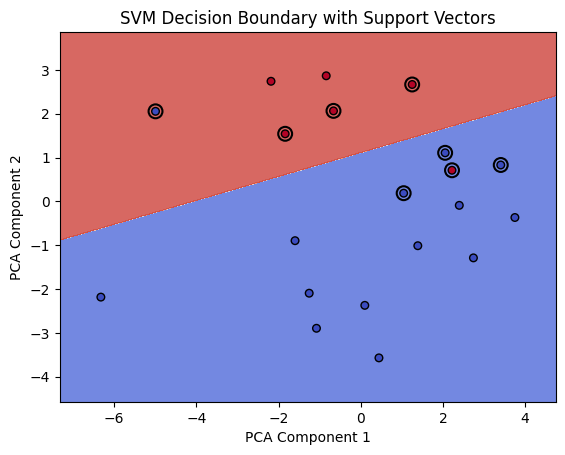

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA

# Step 1: Prepare data
X = np.array(nested_list)
y = np.array(labels)

# Step 2: Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 3: Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X_reduced, y)

# Step 4: Plot the decision boundary, margin, and support vectors
# Create a grid to plot decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the boundary for the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot everything
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')

# Highlight support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)

plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
